<div style="text-align: center; padding: 2em 1em; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); border-radius: 12px; color: white; margin-bottom: 2em;">
  <h1 style="margin: 0; font-size: 2.5em; font-weight: 600; letter-spacing: -0.02em;">Метрики вовлеченности (Engagement Metrics)</h1>
  <p style="margin: 0.5em 0 0 0; font-size: 1.2em; opacity: 0.95;">Полное руководство по метрикам вовлеченности пользователей в играх</p>
</div>

<div style="padding: 1.5em; background: #f8f9fa; border-left: 4px solid #667eea; border-radius: 6px; margin: 1em 0;">
  <p style="margin: 0; color: #2c3e50; line-height: 1.6; font-weight: 400;">
    <strong>Engagement (вовлеченность)</strong> — метрики, показывающие насколько активно и часто пользователи взаимодействуют с игрой.
    Высокая вовлеченность означает, что игроки регулярно возвращаются, проводят много времени в игре и активно используют её функции.
    Это ключевые индикаторы здоровья продукта и предикторы монетизации.
  </p>
</div>


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Библиотеки загружены успешно")


✓ Библиотеки загружены успешно


## Генерация синтетических данных

Для демонстрации всех метрик создадим синтетический датасет с пользовательскими сессиями и активностями.


In [2]:
# Устанавливаем seed для воспроизводимости
np.random.seed(42)

# Параметры датасета
n_users = 5000  # Количество пользователей
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 3, 31)  # 3 месяца данных
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Создаем пользователей с разными профилями вовлеченности
user_profiles = ['high_engaged', 'medium_engaged', 'low_engaged', 'casual']
profile_distribution = [0.15, 0.25, 0.35, 0.25]  # Распределение по профилям

users_data = []
for user_id in range(n_users):
    profile = np.random.choice(user_profiles, p=profile_distribution)
    install_date = start_date + timedelta(days=np.random.randint(0, 30))
    
    users_data.append({
        'user_id': f'user_{user_id:05d}',
        'profile': profile,
        'install_date': install_date
    })

users_df = pd.DataFrame(users_data)

# Генерируем сессии для каждого пользователя
sessions = []
session_id_counter = 0

for idx, user in users_df.iterrows():
    user_id = user['user_id']
    profile = user['profile']
    install_date = user['install_date']
    
    # Параметры в зависимости от профиля
    if profile == 'high_engaged':
        days_active_prob = 0.7  # Вероятность быть активным в день
        sessions_per_day = (3, 8)  # Диапазон сессий в день
        session_duration = (10, 60)  # Минуты
        features_used = (3, 8)  # Количество используемых фич
    elif profile == 'medium_engaged':
        days_active_prob = 0.4
        sessions_per_day = (2, 5)
        session_duration = (5, 30)
        features_used = (2, 5)
    elif profile == 'low_engaged':
        days_active_prob = 0.2
        sessions_per_day = (1, 3)
        session_duration = (3, 15)
        features_used = (1, 3)
    else:  # casual
        days_active_prob = 0.15
        sessions_per_day = (1, 2)
        session_duration = (2, 10)
        features_used = (1, 2)
    
    # Генерируем сессии для каждого дня
    current_date = install_date
    while current_date <= end_date:
        # Проверяем, будет ли пользователь активен в этот день
        if np.random.random() < days_active_prob:
            # Определяем количество сессий в этот день
            num_sessions = np.random.randint(sessions_per_day[0], sessions_per_day[1] + 1)
            
            for _ in range(num_sessions):
                session_id_counter += 1
                
                # Генерируем время начала сессии (равномерно в течение дня)
                hour = np.random.randint(6, 24)  # С 6 утра до 12 ночи
                minute = np.random.randint(0, 60)
                session_start = current_date.replace(hour=hour, minute=minute)
                
                # Длительность сессии (в минутах)
                duration_minutes = np.random.randint(session_duration[0], session_duration[1] + 1)
                session_end = session_start + timedelta(minutes=duration_minutes)
                
                # Количество использованных фич
                num_features = np.random.randint(features_used[0], features_used[1] + 1)
                
                # Количество действий/событий в сессии
                events_count = int(duration_minutes * np.random.uniform(0.5, 2))
                
                # Core loop completion (зависит от длительности и профиля)
                core_loop_completed = duration_minutes > 5 and np.random.random() < (0.8 if profile == 'high_engaged' else 0.5)
                
                sessions.append({
                    'session_id': f'session_{session_id_counter:07d}',
                    'user_id': user_id,
                    'session_date': current_date,
                    'session_start': session_start,
                    'session_end': session_end,
                    'duration_minutes': duration_minutes,
                    'events_count': events_count,
                    'features_used': num_features,
                    'core_loop_completed': core_loop_completed,
                    'profile': profile
                })
        
        current_date += timedelta(days=1)

sessions_df = pd.DataFrame(sessions)

print(f"✓ Создано {len(users_df)} пользователей")
print(f"✓ Сгенерировано {len(sessions_df)} сессий")
print(f"\nРаспределение по профилям:")
print(users_df['profile'].value_counts())
print(f"\nПример данных пользователей:")
print(users_df.head())
print(f"\nПример данных сессий:")
print(sessions_df.head(10))


✓ Создано 5000 пользователей
✓ Сгенерировано 425786 сессий

Распределение по профилям:
profile
low_engaged       1775
medium_engaged    1248
casual            1232
high_engaged       745
Name: count, dtype: int64

Пример данных пользователей:
      user_id         profile install_date
0  user_00000  medium_engaged   2024-01-29
1  user_00001  medium_engaged   2024-01-08
2  user_00002     low_engaged   2024-01-07
3  user_00003     low_engaged   2024-01-23
4  user_00004    high_engaged   2024-01-24

Пример данных сессий:
        session_id     user_id session_date       session_start  \
0  session_0000001  user_00000   2024-01-30 2024-01-30 07:09:00   
1  session_0000002  user_00000   2024-01-30 2024-01-30 18:46:00   
2  session_0000003  user_00000   2024-02-03 2024-02-03 13:02:00   
3  session_0000004  user_00000   2024-02-03 2024-02-03 08:28:00   
4  session_0000005  user_00000   2024-02-03 2024-02-03 11:39:00   
5  session_0000006  user_00000   2024-02-03 2024-02-03 08:35:00   
6  sess

<div style="padding: 1.5em; background: #ffffff; border-radius: 8px; margin: 1em 0; border-left: 4px solid #667eea;">
  <h2 style="margin: 0 0 0.5em 0; color: #212529; font-size: 1.8em; font-weight: 600;">1. Daily Active Users (DAU)</h2>
</div>

### 📍 Определение

**Daily Active Users (DAU)** — количество уникальных пользователей, которые были активны в игре в течение одного дня.

### 📍 Формула расчета

$$
\text{DAU} = \text{Количество уникальных пользователей, активных в день } D
$$

**Активность** обычно определяется как:
- Открытие приложения
- Выполнение хотя бы одного значимого действия (например, прохождение уровня)
- Длительность сессии > минимального порога (например, > 10 секунд)

### 📍 Зачем нужна метрика

DAU — **фундаментальная метрика вовлеченности**, так как она:

1. **Показывает размер активной аудитории**
   - Сколько людей реально играют каждый день
   - Базовая метрика для расчета других показателей

2. **Индикатор здоровья игры**
   - Рост DAU = игра набирает популярность
   - Падение DAU = проблемы с продуктом или маркетингом

3. **Основа для монетизации**
   - Больше DAU = больше потенциальных плательщиков
   - Используется для прогноза выручки

4. **Метрика для инвесторов и стейкхолдеров**
   - Ключевой показатель в отчетности
   - Отражает масштаб бизнеса

### 📍 Что показывает

- **Растущий DAU** — игра привлекает новых пользователей быстрее, чем теряет старых
- **Стабильный DAU** — баланс между притоком и оттоком пользователей
- **Падающий DAU** — отток превышает приток, требуется вмешательство

### 📍 На что влияет

1. **Выручка** — прямая корреляция с количеством активных пользователей
2. **Вирусность** — больше активных игроков = больше приглашений друзей
3. **Данные для анализа** — больший sample size для A/B тестов
4. **Социальные механики** — критическая масса для PvP, гильдий и т.д.

### 📍 Что на нее влияет

**Позитивно влияют:**
- ✅ Новый контент и обновления
- ✅ Маркетинговые кампании
- ✅ Вирусные механики
- ✅ События и промо-акции
- ✅ Push-уведомления
- ✅ Праздники и сезонные события
- ✅ Улучшение retention

**Негативно влияют:**
- ❌ Технические проблемы
- ❌ Недостаток контента
- ❌ Негативные отзывы
- ❌ Конкуренты
- ❌ Выходные дни (для некоторых жанров)
- ❌ Плохой retention

### 📍 Сезонность и паттерны

**Дни недели:**
- **Будни** — стабильный уровень для большинства игр
- **Выходные** — рост на 20-40% для casual игр
- **Понедельник** — часто пик из-за накопленных наград

**Время года:**
- **Праздники** — пики активности (Новый год, Рождество)
- **Лето** — снижение для hardcore игр, рост для mobile casual
- **Сентябрь** — обычно спад после летних каникул

### 📍 Бенчмарки по жанрам

| Жанр игры | DAU/MAU (Stickiness) | Типичный паттерн |
|-----------|----------------------|------------------|
| Hypercasual | 10-20% | Высокая волатильность |
| Casual/Puzzle | 15-25% | Стабильный |
| Match-3 | 20-30% | Стабильный с пиками |
| Strategy/4X | 25-35% | Высокая лояльность |
| RTS | 20-30% | Стабильный |
| RPG | 30-40% | Очень стабильный |
| Idle/Incremental | 35-45% | Постоянная активность |
| Social Casino | 20-30% | Стабильный |
| Battle Royale | 15-25% | Волатильный |

### 📍 Как увеличить DAU

**Краткосрочные тактики (быстрый эффект):**
1. **Push-уведомления**
   - Напоминания о наградах
   - Уведомления о событиях
   - Персонализированные сообщения

2. **События и промо-акции**
   - Limited-time events
   - Бонусы за вход
   - Специальные предложения

3. **Daily login rewards**
   - Прогрессивные награды
   - Streak механики

**Долгосрочные стратегии:**
1. **Улучшение retention**
   - Лучший DAU = следствие хорошего retention

2. **User Acquisition**
   - Привлечение новых пользователей

3. **Контент и обновления**
   - Регулярные релизы нового контента
   - Live-ops

4. **Социальные механики**
   - Гильдии, друзья, кооперативные режимы

### 📍 Расчет DAU на Python


In [3]:
def calculate_dau(sessions_df):
    """
    Рассчитывает DAU для каждого дня
    
    Parameters:
    -----------
    sessions_df : pd.DataFrame
        DataFrame с сессиями пользователей
    
    Returns:
    --------
    pd.DataFrame
        Таблица с DAU по дням
    """
    
    # Группируем по дате и считаем уникальных пользователей
    dau = sessions_df.groupby('session_date')['user_id'].nunique().reset_index()
    dau.columns = ['date', 'dau']
    dau = dau.sort_values('date')
    
    # Добавляем день недели
    dau['day_of_week'] = dau['date'].dt.day_name()
    dau['is_weekend'] = dau['date'].dt.dayofweek.isin([5, 6])
    
    return dau

# Рассчитываем DAU
dau_df = calculate_dau(sessions_df)

print("=" * 80)
print("DAU STATISTICS")
print("=" * 80)
print(f"Средний DAU: {dau_df['dau'].mean():.0f} пользователей")
print(f"Медианный DAU: {dau_df['dau'].median():.0f} пользователей")
print(f"Минимальный DAU: {dau_df['dau'].min():.0f} пользователей")
print(f"Максимальный DAU: {dau_df['dau'].max():.0f} пользователей")
print(f"Стандартное отклонение: {dau_df['dau'].std():.0f}")

# Сравнение будни vs выходные
weekday_dau = dau_df[~dau_df['is_weekend']]['dau'].mean()
weekend_dau = dau_df[dau_df['is_weekend']]['dau'].mean()
difference = ((weekend_dau - weekday_dau) / weekday_dau * 100)

print(f"\nСредний DAU в будни: {weekday_dau:.0f}")
print(f"Средний DAU в выходные: {weekend_dau:.0f}")
print(f"Разница: {difference:+.1f}%")

print(f"\nПервые 10 дней:")
print(dau_df.head(10).to_string(index=False))


DAU STATISTICS
Средний DAU: 1302 пользователей
Медианный DAU: 1540 пользователей
Минимальный DAU: 50 пользователей
Максимальный DAU: 1628 пользователей
Стандартное отклонение: 449

Средний DAU в будни: 1290
Средний DAU в выходные: 1332
Разница: +3.3%

Первые 10 дней:
      date  dau day_of_week  is_weekend
2024-01-01   50      Monday       False
2024-01-02   93     Tuesday       False
2024-01-03  141   Wednesday       False
2024-01-04  205    Thursday       False
2024-01-05  262      Friday       False
2024-01-06  278    Saturday        True
2024-01-07  371      Sunday        True
2024-01-08  425      Monday       False
2024-01-09  464     Tuesday       False
2024-01-10  510   Wednesday       False


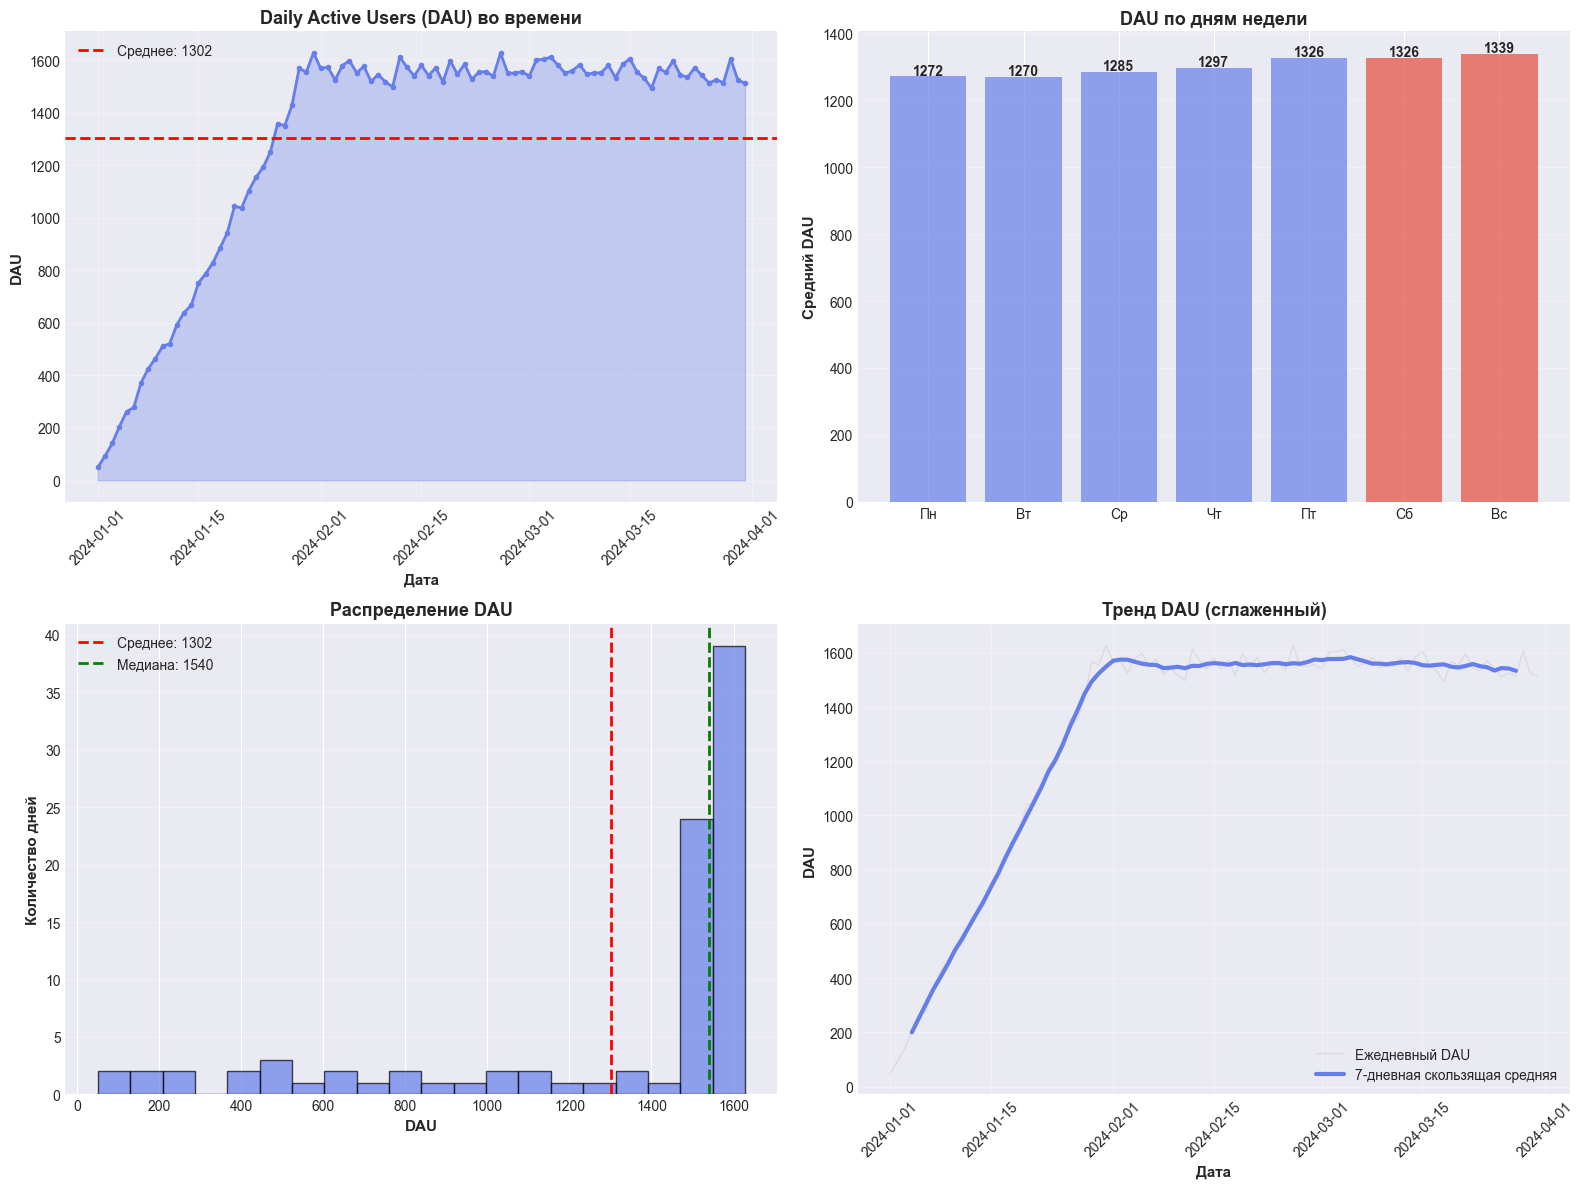

In [4]:
# Визуализация DAU
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: DAU по времени
axes[0, 0].plot(dau_df['date'], dau_df['dau'], linewidth=2, color='#667eea', marker='o', markersize=3)
axes[0, 0].axhline(y=dau_df['dau'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Среднее: {dau_df["dau"].mean():.0f}')
axes[0, 0].fill_between(dau_df['date'], dau_df['dau'], alpha=0.3, color='#667eea')
axes[0, 0].set_xlabel('Дата', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('DAU', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Daily Active Users (DAU) во времени', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)

# График 2: DAU по дням недели
dow_dau = dau_df.groupby('day_of_week')['dau'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
colors = ['#667eea']*5 + ['#e74c3c']*2  # Разные цвета для будней и выходных
axes[0, 1].bar(range(7), dow_dau.values, color=colors, alpha=0.7)
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
axes[0, 1].set_ylabel('Средний DAU', fontsize=11, fontweight='bold')
axes[0, 1].set_title('DAU по дням недели', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, val in enumerate(dow_dau.values):
    axes[0, 1].text(i, val + 5, f'{val:.0f}', ha='center', fontweight='bold')

# График 3: Распределение DAU
axes[1, 0].hist(dau_df['dau'], bins=20, color='#667eea', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=dau_df['dau'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Среднее: {dau_df["dau"].mean():.0f}')
axes[1, 0].axvline(x=dau_df['dau'].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'Медиана: {dau_df["dau"].median():.0f}')
axes[1, 0].set_xlabel('DAU', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Количество дней', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Распределение DAU', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].legend(fontsize=10)

# График 4: Тренд DAU (скользящая средняя)
dau_df['dau_ma7'] = dau_df['dau'].rolling(window=7, center=True).mean()
axes[1, 1].plot(dau_df['date'], dau_df['dau'], linewidth=1, color='#cccccc', 
                alpha=0.5, label='Ежедневный DAU')
axes[1, 1].plot(dau_df['date'], dau_df['dau_ma7'], linewidth=3, color='#667eea', 
                label='7-дневная скользящая средняя')
axes[1, 1].set_xlabel('Дата', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('DAU', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Тренд DAU (сглаженный)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend(fontsize=10)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 2. MAU, WAU и DAU/MAU Ratio (Stickiness)

### 📍 Определение MAU и WAU

**MAU** — уникальные пользователи за 30 дней
**WAU** — уникальные пользователи за 7 дней

### 📍 DAU/MAU Ratio (Stickiness)

$$
\text{Stickiness} = \frac{\text{DAU}}{\text{MAU}} \times 100\%
$$

**Stickiness** показывает, какой процент месячной аудитории играет каждый день.

- **Высокий (>30%)** — очень вовлеченная аудитория
- **Средний (15-30%)** — нормальный уровень  
- **Низкий (<15%)** — низкая частота использования

### 📍 Бенчмарки Stickiness по жанрам

| Жанр | Хороший | Средний | Низкий |
|------|---------|---------|--------|
| Hypercasual | 10-15% | 5-10% | <5% |
| Casual | 15-20% | 10-15% | <10% |
| Match-3 | 20-25% | 15-20% | <15% |
| Strategy | 25-30% | 20-25% | <20% |
| RTS | 20-30% | 15-20% | <15% |
| RPG | 30-35% | 25-30% | <25% |
| Idle | 35-40% | 30-35% | <30% |

### 📍 Расчет на Python


In [5]:
def calculate_mau_wau(sessions_df):
    """Рассчитывает MAU, WAU и Stickiness для каждого дня"""
    
    results = []
    dates = sorted(sessions_df['session_date'].unique())
    
    for date in dates:
        # MAU: уникальные пользователи за последние 30 дней
        date_30_days_ago = date - timedelta(days=30)
        mau_users = sessions_df[
            (sessions_df['session_date'] > date_30_days_ago) &
            (sessions_df['session_date'] <= date)
        ]['user_id'].nunique()
        
        # WAU: уникальные пользователи за последние 7 дней
        date_7_days_ago = date - timedelta(days=7)
        wau_users = sessions_df[
            (sessions_df['session_date'] > date_7_days_ago) &
            (sessions_df['session_date'] <= date)
        ]['user_id'].nunique()
        
        # DAU для этого дня
        dau_users = sessions_df[sessions_df['session_date'] == date]['user_id'].nunique()
        
        # Stickiness
        stickiness = (dau_users / mau_users * 100) if mau_users > 0 else 0
        dau_wau_ratio = (dau_users / wau_users * 100) if wau_users > 0 else 0
        
        results.append({
            'date': date,
            'dau': dau_users,
            'wau': wau_users,
            'mau': mau_users,
            'stickiness': stickiness,
            'dau_wau_ratio': dau_wau_ratio
        })
    
    return pd.DataFrame(results)

# Рассчитываем метрики
engagement_df = calculate_mau_wau(sessions_df)

# Берем последний месяц для анализа
last_30_days = engagement_df.tail(30)

print("=" * 80)
print("MAU, WAU, DAU STATISTICS (последние 30 дней)")
print("=" * 80)
print(f"Средний DAU: {last_30_days['dau'].mean():.0f}")
print(f"Средний WAU: {last_30_days['wau'].mean():.0f}")
print(f"Средний MAU: {last_30_days['mau'].mean():.0f}")
print(f"\nСредний Stickiness (DAU/MAU): {last_30_days['stickiness'].mean():.2f}%")
print(f"Средний DAU/WAU: {last_30_days['dau_wau_ratio'].mean():.2f}%")

print(f"\nПоследние 10 дней:")
print(last_30_days.tail(10)[['date', 'dau', 'wau', 'mau', 'stickiness']].to_string(index=False))


MAU, WAU, DAU STATISTICS (последние 30 дней)
Средний DAU: 1557
Средний WAU: 4194
Средний MAU: 4987

Средний Stickiness (DAU/MAU): 31.23%
Средний DAU/WAU: 37.13%

Последние 10 дней:
      date  dau  wau  mau  stickiness
2024-03-22 1544 4163 4987   30.960497
2024-03-23 1534 4151 4987   30.759976
2024-03-24 1571 4163 4987   31.501905
2024-03-25 1542 4166 4985   30.932798
2024-03-26 1513 4191 4985   30.351053
2024-03-27 1525 4197 4985   30.591775
2024-03-28 1514 4160 4986   30.365022
2024-03-29 1606 4177 4984   32.223114
2024-03-30 1524 4170 4983   30.583986
2024-03-31 1512 4170 4984   30.337079


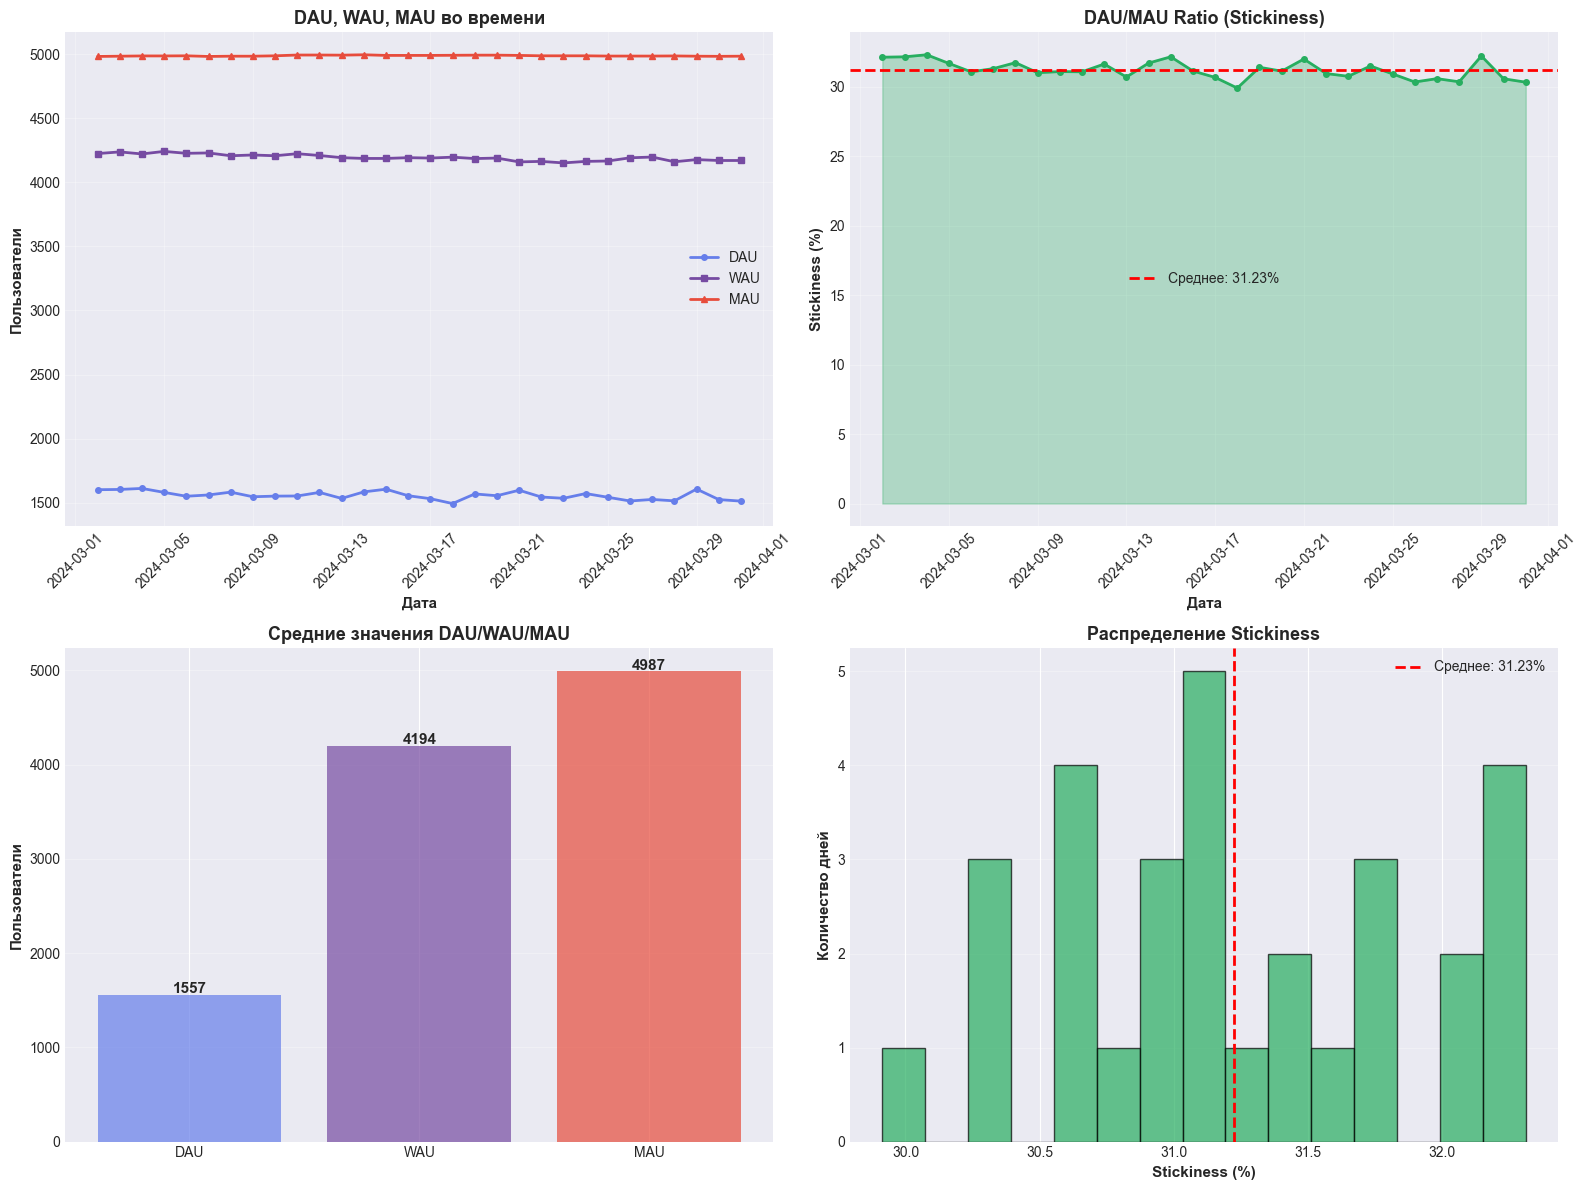

In [6]:
# Визуализация MAU, WAU и Stickiness
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: DAU, WAU, MAU на одном графике
axes[0, 0].plot(last_30_days['date'], last_30_days['dau'], 
                linewidth=2, color='#667eea', label='DAU', marker='o', markersize=4)
axes[0, 0].plot(last_30_days['date'], last_30_days['wau'], 
                linewidth=2, color='#764ba2', label='WAU', marker='s', markersize=4)
axes[0, 0].plot(last_30_days['date'], last_30_days['mau'], 
                linewidth=2, color='#e74c3c', label='MAU', marker='^', markersize=4)
axes[0, 0].set_xlabel('Дата', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Пользователи', fontsize=11, fontweight='bold')
axes[0, 0].set_title('DAU, WAU, MAU во времени', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)

# График 2: Stickiness (DAU/MAU)
axes[0, 1].plot(last_30_days['date'], last_30_days['stickiness'], 
                linewidth=2, color='#27ae60', marker='o', markersize=4)
axes[0, 1].axhline(y=last_30_days['stickiness'].mean(), color='red', 
                   linestyle='--', linewidth=2,
                   label=f'Среднее: {last_30_days["stickiness"].mean():.2f}%')
axes[0, 1].fill_between(last_30_days['date'], last_30_days['stickiness'], 
                        alpha=0.3, color='#27ae60')
axes[0, 1].set_xlabel('Дата', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Stickiness (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('DAU/MAU Ratio (Stickiness)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)

# График 3: Средние значения
avg_metrics = {
    'DAU': last_30_days['dau'].mean(),
    'WAU': last_30_days['wau'].mean(),
    'MAU': last_30_days['mau'].mean()
}
axes[1, 0].bar(avg_metrics.keys(), avg_metrics.values(), 
               color=['#667eea', '#764ba2', '#e74c3c'], alpha=0.7)
axes[1, 0].set_ylabel('Пользователи', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Средние значения DAU/WAU/MAU', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, (key, val) in enumerate(avg_metrics.items()):
    axes[1, 0].text(i, val + 20, f'{val:.0f}', ha='center', fontweight='bold', fontsize=11)

# График 4: Распределение Stickiness
axes[1, 1].hist(last_30_days['stickiness'], bins=15, color='#27ae60', 
                alpha=0.7, edgecolor='black')
axes[1, 1].axvline(x=last_30_days['stickiness'].mean(), color='red', 
                   linestyle='--', linewidth=2,
                   label=f'Среднее: {last_30_days["stickiness"].mean():.2f}%')
axes[1, 1].set_xlabel('Stickiness (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Количество дней', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Распределение Stickiness', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].legend(fontsize=10)

plt.tight_layout()
plt.show()


## 3. Метрики сессий (Session Metrics)

### 📍 Определение

**Session (сессия)** — непрерывный период взаимодействия пользователя с игрой.

Ключевые метрики сессий:
- **Session Count** — количество сессий
- **Sessions per User** — среднее количество сессий на пользователя
- **Session Duration** — длительность сессии
- **Average Session Duration** — средняя длительность сессии

### 📍 Формулы

$$
\text{Sessions per User} = \frac{\text{Total Sessions}}{\text{Unique Users}}
$$

$$
\text{Avg Session Duration} = \frac{\sum \text{Session Durations}}{\text{Total Sessions}}
$$

### 📍 Зачем нужны

1. **Частота использования**
   - Сколько раз пользователи возвращаются в день
   - Формируются ли привычки

2. **Глубина вовлеченности**
   - Длительность сессий показывает интерес
   - Короткие сессии могут указывать на проблемы

3. **Оптимизация контента**
   - Понимание, как долго игроки играют
   - Настройка энергии/таймеров

### 📍 Бенчмарки Session Duration по жанрам

| Жанр | Сессия (минуты) | Сессий/день |
|------|-----------------|-------------|
| Hypercasual | 1-3 | 3-8 |
| Casual | 5-10 | 2-5 |
| Match-3 | 8-15 | 2-4 |
| Strategy | 15-30 | 2-3 |
| RTS | 20-40 | 1-3 |
| RPG | 30-60 | 1-2 |
| MMO | 60-120+ | 1 |

### 📍 Расчет на Python


In [7]:
# Анализ сессий
def analyze_sessions(sessions_df):
    """Анализирует метрики сессий"""
    
    # Общая статистика
    total_sessions = len(sessions_df)
    unique_users = sessions_df['user_id'].nunique()
    sessions_per_user = total_sessions / unique_users
    
    # Длительность сессий
    avg_duration = sessions_df['duration_minutes'].mean()
    median_duration = sessions_df['duration_minutes'].median()
    
    # Статистика по дням
    daily_stats = sessions_df.groupby('session_date').agg({
        'session_id': 'count',
        'user_id': 'nunique',
        'duration_minutes': ['mean', 'median', 'sum']
    }).reset_index()
    
    daily_stats.columns = ['date', 'total_sessions', 'unique_users', 
                           'avg_duration', 'median_duration', 'total_playtime']
    daily_stats['sessions_per_user'] = daily_stats['total_sessions'] / daily_stats['unique_users']
    
    return {
        'total': {
            'sessions': total_sessions,
            'users': unique_users,
            'sessions_per_user': sessions_per_user,
            'avg_duration': avg_duration,
            'median_duration': median_duration
        },
        'daily': daily_stats
    }

session_analysis = analyze_sessions(sessions_df)

print("=" * 80)
print("SESSION METRICS")
print("=" * 80)
print(f"Всего сессий: {session_analysis['total']['sessions']:,}")
print(f"Уникальных пользователей: {session_analysis['total']['users']:,}")
print(f"Сессий на пользователя: {session_analysis['total']['sessions_per_user']:.2f}")
print(f"\nСредняя длительность сессии: {session_analysis['total']['avg_duration']:.2f} минут")
print(f"Медианная длительность сессии: {session_analysis['total']['median_duration']:.2f} минут")

# Анализ по профилям
profile_stats = sessions_df.groupby('profile').agg({
    'session_id': 'count',
    'duration_minutes': 'mean',
    'user_id': 'nunique'
}).reset_index()
profile_stats.columns = ['profile', 'total_sessions', 'avg_duration', 'users']
profile_stats['sessions_per_user'] = profile_stats['total_sessions'] / profile_stats['users']

print(f"\nСтатистика по профилям пользователей:")
print(profile_stats.to_string(index=False))

# Последние 10 дней
print(f"\nПоследние 10 дней:")
print(session_analysis['daily'].tail(10)[
    ['date', 'total_sessions', 'unique_users', 'sessions_per_user', 'avg_duration']
].to_string(index=False))


SESSION METRICS
Всего сессий: 425,786
Уникальных пользователей: 5,000
Сессий на пользователя: 85.16

Средняя длительность сессии: 24.82 минут
Медианная длительность сессии: 21.00 минут

Статистика по профилям пользователей:
       profile  total_sessions  avg_duration  users  sessions_per_user
        casual           20909      6.020231   1232          16.971591
  high_engaged          217423     35.024326    745         291.842953
   low_engaged           53711      9.007447   1775          30.259718
medium_engaged          133743     17.512386   1248         107.165865

Последние 10 дней:
      date  total_sessions  unique_users  sessions_per_user  avg_duration
2024-03-22            5523          1544           3.577073     24.824371
2024-03-23            5560          1534           3.624511     25.105216
2024-03-24            5640          1571           3.590070     24.615426
2024-03-25            5514          1542           3.575875     25.247914
2024-03-26            5438     

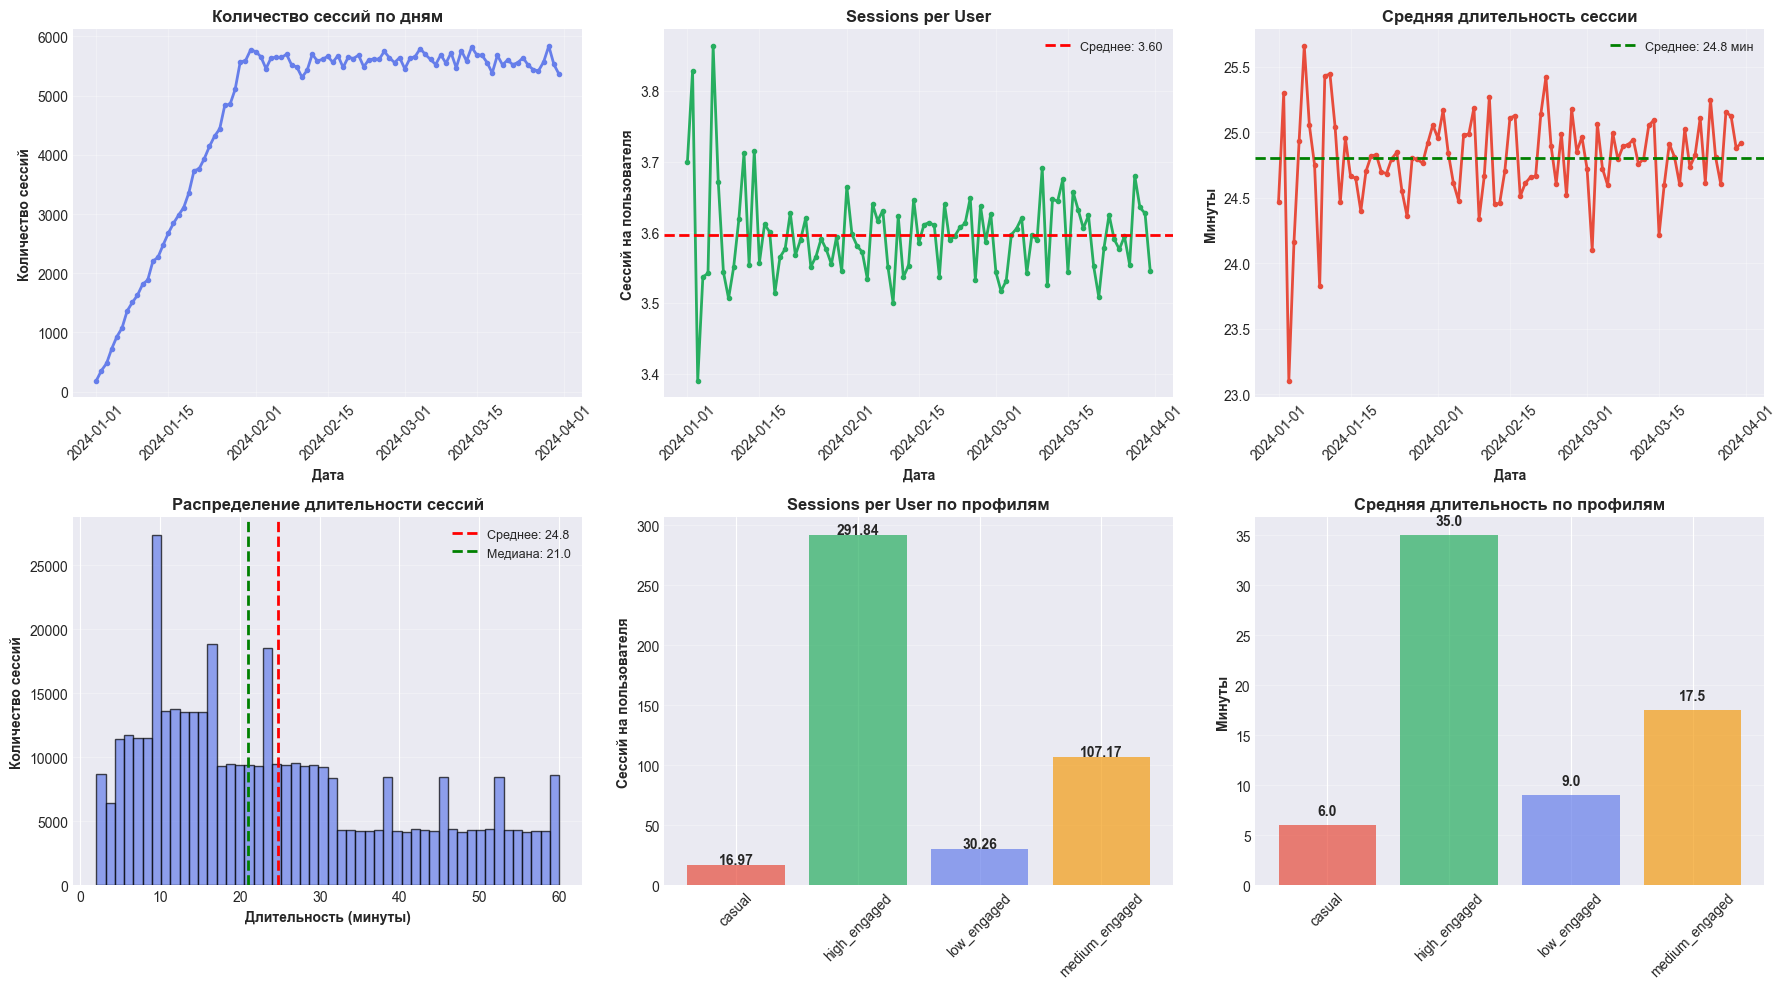

In [8]:
# Визуализация метрик сессий
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

daily_stats = session_analysis['daily']

# График 1: Количество сессий во времени
axes[0, 0].plot(daily_stats['date'], daily_stats['total_sessions'], 
                linewidth=2, color='#667eea', marker='o', markersize=3)
axes[0, 0].set_xlabel('Дата', fontsize=10, fontweight='bold')
axes[0, 0].set_ylabel('Количество сессий', fontsize=10, fontweight='bold')
axes[0, 0].set_title('Количество сессий по дням', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# График 2: Sessions per User
axes[0, 1].plot(daily_stats['date'], daily_stats['sessions_per_user'], 
                linewidth=2, color='#27ae60', marker='o', markersize=3)
axes[0, 1].axhline(y=daily_stats['sessions_per_user'].mean(), color='red', 
                   linestyle='--', linewidth=2,
                   label=f'Среднее: {daily_stats["sessions_per_user"].mean():.2f}')
axes[0, 1].set_xlabel('Дата', fontsize=10, fontweight='bold')
axes[0, 1].set_ylabel('Сессий на пользователя', fontsize=10, fontweight='bold')
axes[0, 1].set_title('Sessions per User', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(fontsize=9)
axes[0, 1].tick_params(axis='x', rotation=45)

# График 3: Средняя длительность сессии
axes[0, 2].plot(daily_stats['date'], daily_stats['avg_duration'], 
                linewidth=2, color='#e74c3c', marker='o', markersize=3)
axes[0, 2].axhline(y=daily_stats['avg_duration'].mean(), color='green', 
                   linestyle='--', linewidth=2,
                   label=f'Среднее: {daily_stats["avg_duration"].mean():.1f} мин')
axes[0, 2].set_xlabel('Дата', fontsize=10, fontweight='bold')
axes[0, 2].set_ylabel('Минуты', fontsize=10, fontweight='bold')
axes[0, 2].set_title('Средняя длительность сессии', fontsize=12, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].legend(fontsize=9)
axes[0, 2].tick_params(axis='x', rotation=45)

# График 4: Распределение длительности сессий
axes[1, 0].hist(sessions_df['duration_minutes'], bins=50, color='#667eea', 
                alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=sessions_df['duration_minutes'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f'Среднее: {sessions_df["duration_minutes"].mean():.1f}')
axes[1, 0].axvline(x=sessions_df['duration_minutes'].median(), color='green', 
                   linestyle='--', linewidth=2, label=f'Медиана: {sessions_df["duration_minutes"].median():.1f}')
axes[1, 0].set_xlabel('Длительность (минуты)', fontsize=10, fontweight='bold')
axes[1, 0].set_ylabel('Количество сессий', fontsize=10, fontweight='bold')
axes[1, 0].set_title('Распределение длительности сессий', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].legend(fontsize=9)

# График 5: Сессии по профилям
axes[1, 1].bar(profile_stats['profile'], profile_stats['sessions_per_user'], 
               color=['#e74c3c', '#27ae60', '#667eea', '#f39c12'], alpha=0.7)
axes[1, 1].set_ylabel('Сессий на пользователя', fontsize=10, fontweight='bold')
axes[1, 1].set_title('Sessions per User по профилям', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, val in enumerate(profile_stats['sessions_per_user']):
    axes[1, 1].text(i, val + 0.5, f'{val:.2f}', ha='center', fontweight='bold')

# График 6: Длительность сессий по профилям
axes[1, 2].bar(profile_stats['profile'], profile_stats['avg_duration'], 
               color=['#e74c3c', '#27ae60', '#667eea', '#f39c12'], alpha=0.7)
axes[1, 2].set_ylabel('Минуты', fontsize=10, fontweight='bold')
axes[1, 2].set_title('Средняя длительность по профилям', fontsize=12, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3, axis='y')
axes[1, 2].tick_params(axis='x', rotation=45)
for i, val in enumerate(profile_stats['avg_duration']):
    axes[1, 2].text(i, val + 1, f'{val:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## 4. Time in Game и Playtime Metrics

### 📍 Определение

**Time in Game** — общее время, проведенное пользователями в игре.

Ключевые метрики:
- **Total Playtime** — общее время всех пользователей
- **Average Playtime per User** — среднее время на пользователя
- **Daily Playtime** — время в игре за день

### 📍 Формулы

$$
\text{Avg Playtime per User} = \frac{\text{Total Playtime}}{\text{Unique Users}}
$$

$$
\text{Total Daily Playtime} = \sum \text{Session Durations for Day}
$$

### 📍 Зачем нужна

1. **Глубина вовлеченности**
   - Показывает реальное время в игре
   - Коррелирует с монетизацией

2. **LTV prediction**
   - Playtime — сильный предиктор LTV
   - Чем больше играют, тем выше вероятность платежа

3. **Content sufficiency**
   - Достаточно ли контента
   - Когда игроки выгорают

### 📍 Бенчмарки Playtime

| Жанр | Playtime/день | Playtime/месяц |
|------|---------------|----------------|
| Hypercasual | 5-15 мин | 2-5 часов |
| Casual | 15-30 мин | 5-10 часов |
| Match-3 | 20-40 мин | 8-15 часов |
| Strategy | 30-60 мин | 15-30 часов |
| RTS | 45-90 мин | 20-40 часов |
| RPG | 60-120 мин | 30-60 часов |
| MMO | 2-4 часа | 60-120+ часов |

### 📍 Расчет на Python


In [9]:
# Анализ Playtime
def analyze_playtime(sessions_df):
    """Анализирует метрики времени в игре"""
    
    # Общая статистика
    total_playtime_minutes = sessions_df['duration_minutes'].sum()
    total_playtime_hours = total_playtime_minutes / 60
    unique_users = sessions_df['user_id'].nunique()
    avg_playtime_per_user = total_playtime_minutes / unique_users
    
    # Статистика по дням
    daily_playtime = sessions_df.groupby('session_date').agg({
        'duration_minutes': 'sum',
        'user_id': 'nunique'
    }).reset_index()
    daily_playtime.columns = ['date', 'total_playtime_minutes', 'unique_users']
    daily_playtime['avg_playtime_per_user'] = (
        daily_playtime['total_playtime_minutes'] / daily_playtime['unique_users']
    )
    daily_playtime['total_playtime_hours'] = daily_playtime['total_playtime_minutes'] / 60
    
    # Статистика по пользователям
    user_playtime = sessions_df.groupby('user_id').agg({
        'duration_minutes': 'sum',
        'session_id': 'count'
    }).reset_index()
    user_playtime.columns = ['user_id', 'total_playtime', 'session_count']
    
    return {
        'total': {
            'playtime_minutes': total_playtime_minutes,
            'playtime_hours': total_playtime_hours,
            'users': unique_users,
            'avg_per_user': avg_playtime_per_user
        },
        'daily': daily_playtime,
        'user': user_playtime
    }

playtime_analysis = analyze_playtime(sessions_df)

print("=" * 80)
print("PLAYTIME METRICS")
print("=" * 80)
print(f"Общее время в игре: {playtime_analysis['total']['playtime_hours']:,.0f} часов "
      f"({playtime_analysis['total']['playtime_minutes']:,.0f} минут)")
print(f"Уникальных пользователей: {playtime_analysis['total']['users']:,}")
print(f"Среднее время на пользователя: {playtime_analysis['total']['avg_per_user']:.1f} минут "
      f"({playtime_analysis['total']['avg_per_user']/60:.2f} часов)")

# Последние 10 дней
last_10_days = playtime_analysis['daily'].tail(10)
print(f"\nСредний daily playtime (последние 10 дней):")
print(f"  - На пользователя: {last_10_days['avg_playtime_per_user'].mean():.1f} минут")
print(f"  - Всего за день: {last_10_days['total_playtime_hours'].mean():.1f} часов")

# Распределение по пользователям
user_playtime = playtime_analysis['user']
print(f"\nРаспределение playtime по пользователям:")
print(f"  - Медиана: {user_playtime['total_playtime'].median():.1f} минут")
print(f"  - Top 10% игроков: {user_playtime['total_playtime'].quantile(0.9):.1f} минут")
print(f"  - Top 1% игроков: {user_playtime['total_playtime'].quantile(0.99):.1f} минут")


PLAYTIME METRICS
Общее время в игре: 176,115 часов (10,566,929 минут)
Уникальных пользователей: 5,000
Среднее время на пользователя: 2113.4 минут (35.22 часов)

Средний daily playtime (последние 10 дней):
  - На пользователя: 89.8 минут
  - Всего за день: 2301.5 часов

Распределение playtime по пользователям:
  - Медиана: 316.0 минут
  - Top 10% игроков: 9420.0 минут
  - Top 1% игроков: 12556.2 минут


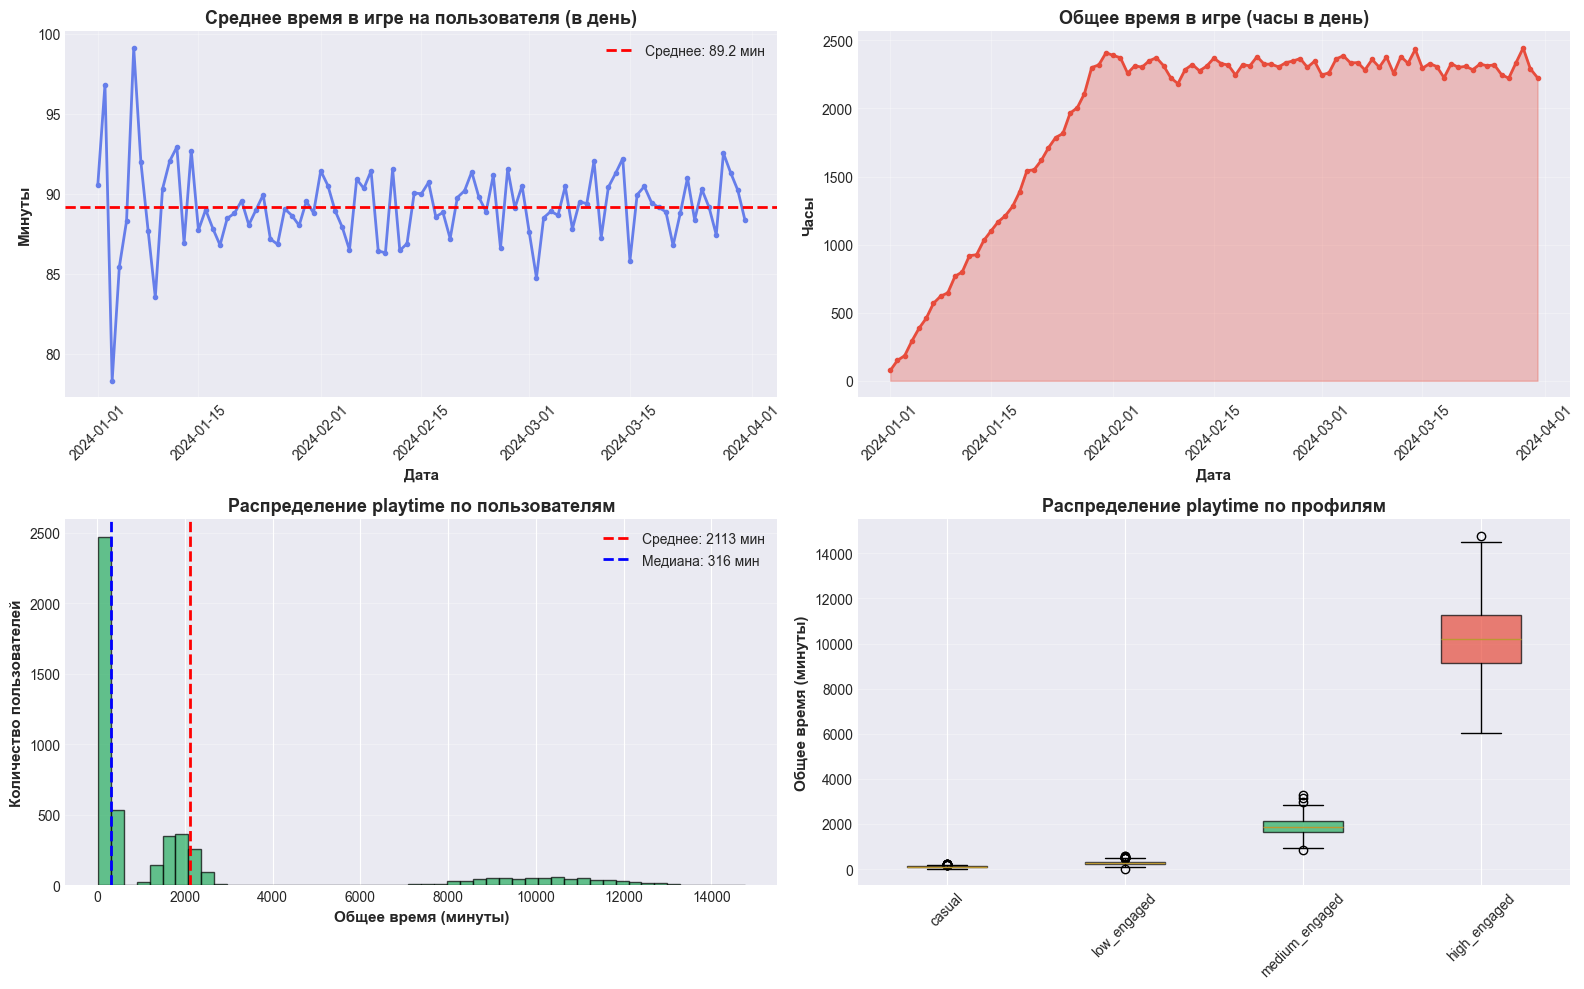

In [10]:
# Визуализация Playtime
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

daily_playtime = playtime_analysis['daily']
user_playtime = playtime_analysis['user']

# График 1: Daily playtime per user
axes[0, 0].plot(daily_playtime['date'], daily_playtime['avg_playtime_per_user'], 
                linewidth=2, color='#667eea', marker='o', markersize=3)
axes[0, 0].axhline(y=daily_playtime['avg_playtime_per_user'].mean(), color='red', 
                   linestyle='--', linewidth=2,
                   label=f'Среднее: {daily_playtime["avg_playtime_per_user"].mean():.1f} мин')
axes[0, 0].set_xlabel('Дата', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Минуты', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Среднее время в игре на пользователя (в день)', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)

# График 2: Total daily playtime (в часах)
axes[0, 1].plot(daily_playtime['date'], daily_playtime['total_playtime_hours'], 
                linewidth=2, color='#e74c3c', marker='o', markersize=3)
axes[0, 1].fill_between(daily_playtime['date'], daily_playtime['total_playtime_hours'], 
                        alpha=0.3, color='#e74c3c')
axes[0, 1].set_xlabel('Дата', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Часы', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Общее время в игре (часы в день)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# График 3: Распределение playtime по пользователям
axes[1, 0].hist(user_playtime['total_playtime'], bins=50, color='#27ae60', 
                alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=user_playtime['total_playtime'].mean(), color='red', 
                   linestyle='--', linewidth=2, 
                   label=f'Среднее: {user_playtime["total_playtime"].mean():.0f} мин')
axes[1, 0].axvline(x=user_playtime['total_playtime'].median(), color='blue', 
                   linestyle='--', linewidth=2, 
                   label=f'Медиана: {user_playtime["total_playtime"].median():.0f} мин')
axes[1, 0].set_xlabel('Общее время (минуты)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Количество пользователей', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Распределение playtime по пользователям', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].legend(fontsize=10)

# График 4: Box plot playtime по профилям
profile_playtime = sessions_df.groupby(['user_id', 'profile'])['duration_minutes'].sum().reset_index()
profile_order = ['casual', 'low_engaged', 'medium_engaged', 'high_engaged']
colors_box = ['#f39c12', '#667eea', '#27ae60', '#e74c3c']

box_data = [profile_playtime[profile_playtime['profile'] == p]['duration_minutes'].values 
            for p in profile_order]
bp = axes[1, 1].boxplot(box_data, labels=profile_order, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 1].set_ylabel('Общее время (минуты)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Распределение playtime по профилям', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 5. Feature Adoption и Core Loop Completion

### 📍 Определение Feature Adoption

**Feature Adoption Rate** — процент пользователей, которые использовали определенную фичу.

$$
\text{Feature Adoption} = \frac{\text{Пользователи, использовавшие фичу}}{\text{Всего пользователей}} \times 100\%
$$

### 📍 Определение Core Loop Completion

**Core Loop Completion Rate** — процент сессий, в которых пользователь завершил основной игровой цикл (core loop).

$$
\text{Core Loop Completion} = \frac{\text{Сессии с завершенным core loop}}{\text{Всего сессий}} \times 100\%
$$

**Core Loop** — основной игровой цикл, который игроки повторяют:
- Match-3: прохождение уровня
- RPG: квест или бой
- Strategy: постройка/улучшение → ресурсы → следующая постройка
- Idle: сбор ресурсов → улучшение → больше ресурсов

### 📍 Зачем нужны

**Feature Adoption:**
1. Понимание, какие фичи популярны
2. Выявление неиспользуемых фич (кандидаты на удаление)
3. Оценка успешности новых функций
4. Приоритизация разработки

**Core Loop Completion:**
1. Показывает реальную вовлеченность
2. Индикатор понимания игровой механики
3. Предиктор retention и монетизации
4. Диагностика проблем в игровом процессе

### 📍 Бенчмарки

**Feature Adoption:**
- **Основные фичи**: >80% пользователей
- **Вторичные фичи**: 40-80%
- **Продвинутые фичи**: 10-40%
- **Нишевые фичи**: <10%

**Core Loop Completion:**
- **Отлично**: >70% сессий
- **Хорошо**: 50-70%
- **Требует улучшения**: 30-50%
- **Проблема**: <30%

### 📍 Расчет на Python


In [11]:
# Feature Adoption Analysis
def analyze_feature_adoption(sessions_df):
    """Анализирует использование фич"""
    
    total_users = sessions_df['user_id'].nunique()
    
    # Группируем по количеству используемых фич
    user_features = sessions_df.groupby('user_id')['features_used'].max()
    
    # Считаем пользователей, использовавших N+ фич
    feature_adoption = []
    for n_features in range(1, 9):
        users_with_n_features = (user_features >= n_features).sum()
        adoption_rate = (users_with_n_features / total_users * 100)
        feature_adoption.append({
            'min_features': n_features,
            'users': users_with_n_features,
            'adoption_rate': adoption_rate
        })
    
    return pd.DataFrame(feature_adoption)

# Core Loop Completion Analysis
def analyze_core_loop(sessions_df):
    """Анализирует завершение core loop"""
    
    total_sessions = len(sessions_df)
    completed_sessions = sessions_df['core_loop_completed'].sum()
    completion_rate = (completed_sessions / total_sessions * 100)
    
    # По дням
    daily_completion = sessions_df.groupby('session_date').agg({
        'core_loop_completed': ['sum', 'count']
    }).reset_index()
    daily_completion.columns = ['date', 'completed', 'total']
    daily_completion['completion_rate'] = (
        daily_completion['completed'] / daily_completion['total'] * 100
    )
    
    # По профилям
    profile_completion = sessions_df.groupby('profile').agg({
        'core_loop_completed': ['sum', 'count']
    }).reset_index()
    profile_completion.columns = ['profile', 'completed', 'total']
    profile_completion['completion_rate'] = (
        profile_completion['completed'] / profile_completion['total'] * 100
    )
    
    return {
        'overall': {
            'total_sessions': total_sessions,
            'completed': completed_sessions,
            'rate': completion_rate
        },
        'daily': daily_completion,
        'profile': profile_completion
    }

feature_adoption = analyze_feature_adoption(sessions_df)
core_loop_analysis = analyze_core_loop(sessions_df)

print("=" * 80)
print("FEATURE ADOPTION")
print("=" * 80)
print(feature_adoption.to_string(index=False))

print("\n" + "=" * 80)
print("CORE LOOP COMPLETION")
print("=" * 80)
print(f"Всего сессий: {core_loop_analysis['overall']['total_sessions']:,}")
print(f"Сессий с завершенным core loop: {core_loop_analysis['overall']['completed']:,}")
print(f"Core Loop Completion Rate: {core_loop_analysis['overall']['rate']:.2f}%")

print(f"\nCompletion Rate по профилям:")
print(core_loop_analysis['profile'].to_string(index=False))

# Последние 10 дней
print(f"\nПоследние 10 дней:")
print(core_loop_analysis['daily'].tail(10)[['date', 'completed', 'total', 'completion_rate']].to_string(index=False))


FEATURE ADOPTION
 min_features  users  adoption_rate
            1   5000         100.00
            2   4996          99.92
            3   3767          75.34
            4   1993          39.86
            5   1993          39.86
            6    745          14.90
            7    745          14.90
            8    745          14.90

CORE LOOP COMPLETION
Всего сессий: 425,786
Сессий с завершенным core loop: 264,710
Core Loop Completion Rate: 62.17%

Completion Rate по профилям:
       profile  completed  total  completion_rate
        casual       5791  20909        27.696207
  high_engaged     174092 217423        80.070646
   low_engaged      20455  53711        38.083447
medium_engaged      64372 133743        48.131117

Последние 10 дней:
      date  completed  total  completion_rate
2024-03-22       3381   5523        61.216730
2024-03-23       3470   5560        62.410072
2024-03-24       3497   5640        62.003546
2024-03-25       3422   5514        62.060210
2024-03-26 

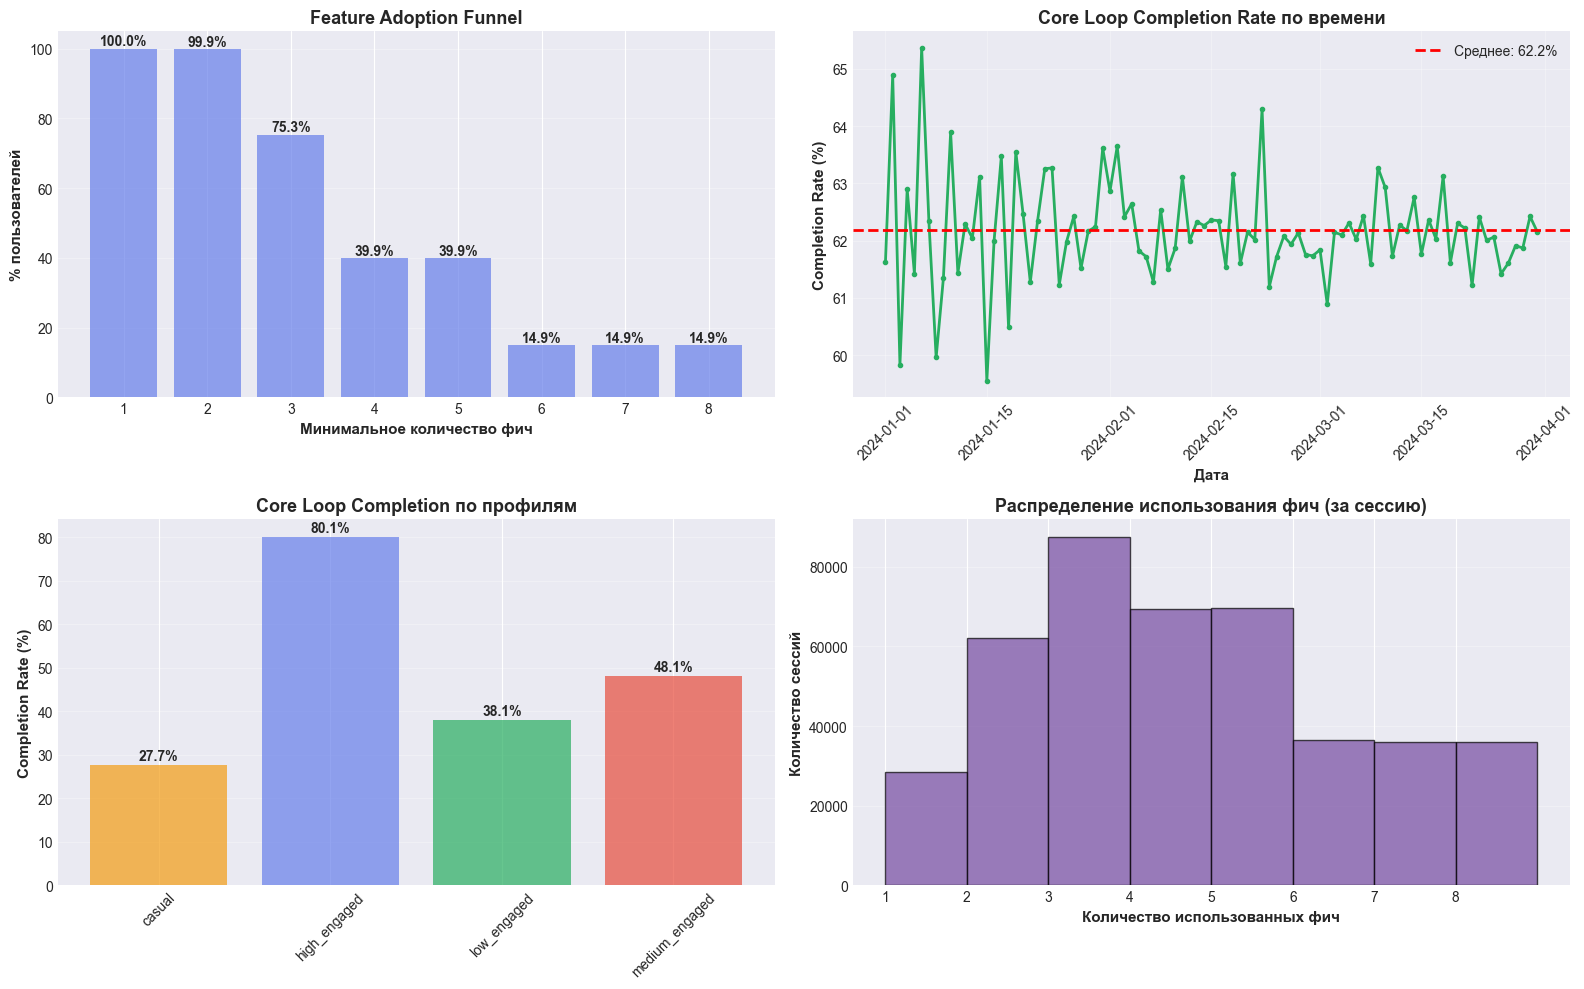

In [12]:
# Визуализация Feature Adoption и Core Loop Completion
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# График 1: Feature Adoption (воронка)
axes[0, 0].bar(feature_adoption['min_features'], feature_adoption['adoption_rate'], 
               color='#667eea', alpha=0.7)
axes[0, 0].set_xlabel('Минимальное количество фич', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('% пользователей', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Feature Adoption Funnel', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, row in feature_adoption.iterrows():
    axes[0, 0].text(row['min_features'], row['adoption_rate'] + 1, 
                    f'{row["adoption_rate"]:.1f}%', ha='center', fontweight='bold')

# График 2: Core Loop Completion по времени
daily_completion = core_loop_analysis['daily']
axes[0, 1].plot(daily_completion['date'], daily_completion['completion_rate'], 
                linewidth=2, color='#27ae60', marker='o', markersize=3)
axes[0, 1].axhline(y=daily_completion['completion_rate'].mean(), color='red', 
                   linestyle='--', linewidth=2,
                   label=f'Среднее: {daily_completion["completion_rate"].mean():.1f}%')
axes[0, 1].set_xlabel('Дата', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Completion Rate (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Core Loop Completion Rate по времени', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)

# График 3: Core Loop Completion по профилям
profile_completion = core_loop_analysis['profile']
colors_prof = ['#f39c12', '#667eea', '#27ae60', '#e74c3c']
axes[1, 0].bar(profile_completion['profile'], profile_completion['completion_rate'], 
               color=colors_prof, alpha=0.7)
axes[1, 0].set_ylabel('Completion Rate (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Core Loop Completion по профилям', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, row in profile_completion.iterrows():
    axes[1, 0].text(i, row['completion_rate'] + 1, f'{row["completion_rate"]:.1f}%', 
                    ha='center', fontweight='bold')

# График 4: Распределение features_used по сессиям
axes[1, 1].hist(sessions_df['features_used'], bins=range(1, 10), color='#764ba2', 
                alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Количество использованных фич', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Количество сессий', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Распределение использования фич (за сессию)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_xticks(range(1, 9))

plt.tight_layout()
plt.show()


<div style="padding: 2em; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); border-radius: 12px; margin: 2em 0; color: white;">
  <h2 style="margin: 0 0 1em 0; font-size: 2em; font-weight: 600;">📍 Резюме и Best Practices</h2>
</div>

## Ключевые выводы

### 📍 Иерархия метрик engagement

1. **DAU, WAU, MAU** — базовые метрики размера аудитории
   - Растущий DAU = здоровый продукт
   - Следите за трендами, а не абсолютными значениями

2. **Stickiness (DAU/MAU)** — качество вовлеченности
   - Более важна, чем просто MAU
   - Показывает привычку использования

3. **Session Metrics** — глубина взаимодействия
   - Частота сессий = привычка
   - Длительность сессий = интерес

4. **Playtime** — реальное время в продукте
   - Сильный предиктор LTV
   - Основа для контент-планирования

5. **Feature Adoption** — использование возможностей
   - Какие фичи работают
   - Что можно убрать

6. **Core Loop Completion** — понимание механик
   - Завершают ли игроки core loop
   - Предиктор retention

### 📍 Типичные соотношения метрик

**Здоровые соотношения:**
```
DAU : WAU : MAU = 1 : 2-3 : 4-5 (для mid-core/hardcore)
DAU : WAU : MAU = 1 : 3-5 : 8-10 (для casual)

Sessions per DAU: 2-4 (среднее)
Avg Session Duration: зависит от жанра (см. бенчмарки)

Stickiness (DAU/MAU):
  - Casual: 15-20%
  - Mid-core: 25-30%
  - Hardcore: 30-40%
```

### 📍 Красные флаги (Red Flags)

1. **Падающий DAU** при росте MAU
   - Пользователи приходят, но не возвращаются
   - Проблема с retention

2. **Низкий Stickiness** (<10%)
   - Пользователи не формируют привычку
   - Нужно работать над daily hooks

3. **Снижение Session Duration**
   - Пользователи теряют интерес
   - Проблемы с контентом или балансом

4. **Низкий Core Loop Completion** (<30%)
   - Игроки не понимают механику
   - Слишком сложно или нет мотивации

5. **Падающие Sessions per User**
   - Снижение частоты возвращений
   - Недостаток мотивации или push-уведомлений

### 📍 Как улучшить Engagement

#### 🎯 Краткосрочные тактики (0-2 недели)

1. **Push-уведомления**
   - Daily rewards reminders
   - Event notifications
   - Personalized messages
   
2. **Events и Limited-Time Offers**
   - Weekend events
   - Holiday specials
   - FOMO mechanics

3. **Daily Login Rewards**
   - Прогрессивные награды
   - Streak bonuses
   - Comeback rewards

#### 🎯 Среднесрочные стратегии (1-3 месяца)

1. **Content Updates**
   - Новые уровни/контент
   - Сезонные обновления
   - Live-ops calendar

2. **Балансировка**
   - Оптимизация сложности
   - Настройка прогрессии
   - Улучшение rewards

3. **Улучшение Onboarding**
   - Лучший FTUE
   - Tutorials
   - Early game hooks

#### 🎯 Долгосрочные инициативы (3+ месяца)

1. **Социальные механики**
   - Guilds/Clans
   - Multiplayer режимы
   - Social rewards

2. **Meta-игра**
   - Долгосрочные цели
   - Collection mechanics
   - Progression systems

3. **Персонализация**
   - Адаптивный контент
   - Personalized offers
   - Segmented experience

### 📍 A/B тестирование Engagement метрик

**Что тестировать:**
- Новые фичи (Feature Adoption)
- Изменения в core loop (Completion Rate)
- Push-уведомления (DAU, Sessions)
- Rewards балансировка (Session Duration, Playtime)
- Onboarding изменения (Early engagement)

**Ключевые метрики для A/B тестов:**
- Primary: DAU, Stickiness, Retention
- Secondary: Sessions per User, Session Duration
- Guardrail: Churn, Negative feedback

### 📍 Взаимосвязь с другими метриками

**Engagement → Retention:**
- Высокий engagement = высокий retention
- Session Count day 1 предсказывает D7 retention

**Engagement → Monetization:**
- Playtime коррелирует с ARPU
- Sessions per User предсказывает конверсию в плательщиков

**Engagement → Virality:**
- Активные пользователи больше приглашают друзей
- High engagement → better K-factor

### 📍 Специфика по жанрам

**Hypercasual:**
- Низкий engagement, высокая волатильность
- Фокус на простоте и instant fun

**Casual/Match-3:**
- Средний engagement, регулярные сессии
- Daily habits, progressive rewards

**Strategy/RTS:**
- Высокий engagement, длинные сессии
- Долгосрочные цели, социальные механики

**RPG/MMO:**
- Очень высокий engagement
- Long-term progression, community

---

## Финальный Dashboard всех метрик


In [13]:
# Финальный Summary Dashboard
print("\n" + "=" * 100)
print(" " * 35 + "📊 ENGAGEMENT METRICS SUMMARY")
print("=" * 100)

# Берем последние 30 дней
recent_data = engagement_df.tail(30)
recent_sessions = sessions_df[sessions_df['session_date'].isin(recent_data['date'])]

print("\n🎯 ОСНОВНЫЕ МЕТРИКИ (последние 30 дней):")
print("-" * 100)
print(f"{'Метрика':<40} {'Значение':<25} {'Оценка':<35}")
print("-" * 100)

# DAU
avg_dau = recent_data['dau'].mean()
print(f"{'Average DAU':<40} {avg_dau:.0f} пользователей")

# MAU
avg_mau = recent_data['mau'].mean()
print(f"{'Average MAU':<40} {avg_mau:.0f} пользователей")

# Stickiness
avg_stickiness = recent_data['stickiness'].mean()
stickiness_status = "✅ Отлично" if avg_stickiness > 25 else "⚠️ Средне" if avg_stickiness > 15 else "❌ Низко"
print(f"{'Stickiness (DAU/MAU)':<40} {avg_stickiness:.2f}% {'':<18} {stickiness_status}")

# Sessions per User
avg_sessions_per_user = session_analysis['daily']['sessions_per_user'].tail(30).mean()
print(f"{'Sessions per DAU':<40} {avg_sessions_per_user:.2f} сессий/день")

# Session Duration
avg_session_duration = session_analysis['daily']['avg_duration'].tail(30).mean()
print(f"{'Average Session Duration':<40} {avg_session_duration:.1f} минут")

# Playtime per User
avg_playtime = playtime_analysis['daily']['avg_playtime_per_user'].tail(30).mean()
print(f"{'Average Daily Playtime per User':<40} {avg_playtime:.1f} минут")

# Core Loop Completion
core_loop_rate = core_loop_analysis['overall']['rate']
core_status = "✅ Отлично" if core_loop_rate > 60 else "⚠️ Средне" if core_loop_rate > 40 else "❌ Проблема"
print(f"{'Core Loop Completion Rate':<40} {core_loop_rate:.2f}% {'':<18} {core_status}")

print("-" * 100)

print("\n📈 ДИНАМИКА (сравнение первых и последних 7 дней):")
print("-" * 100)

# Сравнение первых и последних 7 дней
first_week = engagement_df.head(7)
last_week = engagement_df.tail(7)

dau_change = ((last_week['dau'].mean() - first_week['dau'].mean()) / first_week['dau'].mean() * 100)
stickiness_change = last_week['stickiness'].mean() - first_week['stickiness'].mean()

print(f"{'DAU':<40} {dau_change:+.1f}%")
print(f"{'Stickiness':<40} {stickiness_change:+.2f} п.п.")

print("-" * 100)

print("\n👥 ПРОФИЛИ ПОЛЬЗОВАТЕЛЕЙ:")
print("-" * 100)
print(f"{'Профиль':<20} {'Пользователи':<15} {'Сессий/день':<15} {'Длительность':<15} {'Core Loop %':<15}")
print("-" * 100)

for _, row in profile_stats.iterrows():
    profile_core = core_loop_analysis['profile'][
        core_loop_analysis['profile']['profile'] == row['profile']
    ]['completion_rate'].values[0]
    
    print(f"{row['profile']:<20} {row['users']:<15} "
          f"{row['sessions_per_user']:<15.2f} "
          f"{row['avg_duration']:<15.1f} "
          f"{profile_core:<15.1f}")

print("-" * 100)

print("\n✨ FEATURE ADOPTION:")
print("-" * 100)
high_adoption_users = feature_adoption[feature_adoption['min_features'] >= 5]['users'].iloc[0]
high_adoption_pct = feature_adoption[feature_adoption['min_features'] >= 5]['adoption_rate'].iloc[0]
print(f"Пользователей с 5+ фичами: {high_adoption_users} ({high_adoption_pct:.1f}%)")

print("\n" + "=" * 100)
print("✅ Анализ завершен!")
print("=" * 100)



                                   📊 ENGAGEMENT METRICS SUMMARY

🎯 ОСНОВНЫЕ МЕТРИКИ (последние 30 дней):
----------------------------------------------------------------------------------------------------
Метрика                                  Значение                  Оценка                             
----------------------------------------------------------------------------------------------------
Average DAU                              1557 пользователей
Average MAU                              4987 пользователей
Stickiness (DAU/MAU)                     31.23%                    ✅ Отлично
Sessions per DAU                         3.60 сессий/день
Average Session Duration                 24.8 минут
Average Daily Playtime per User          89.3 минут
Core Loop Completion Rate                62.17%                    ✅ Отлично
----------------------------------------------------------------------------------------------------

📈 ДИНАМИКА (сравнение первых и последних 7 дней):
-

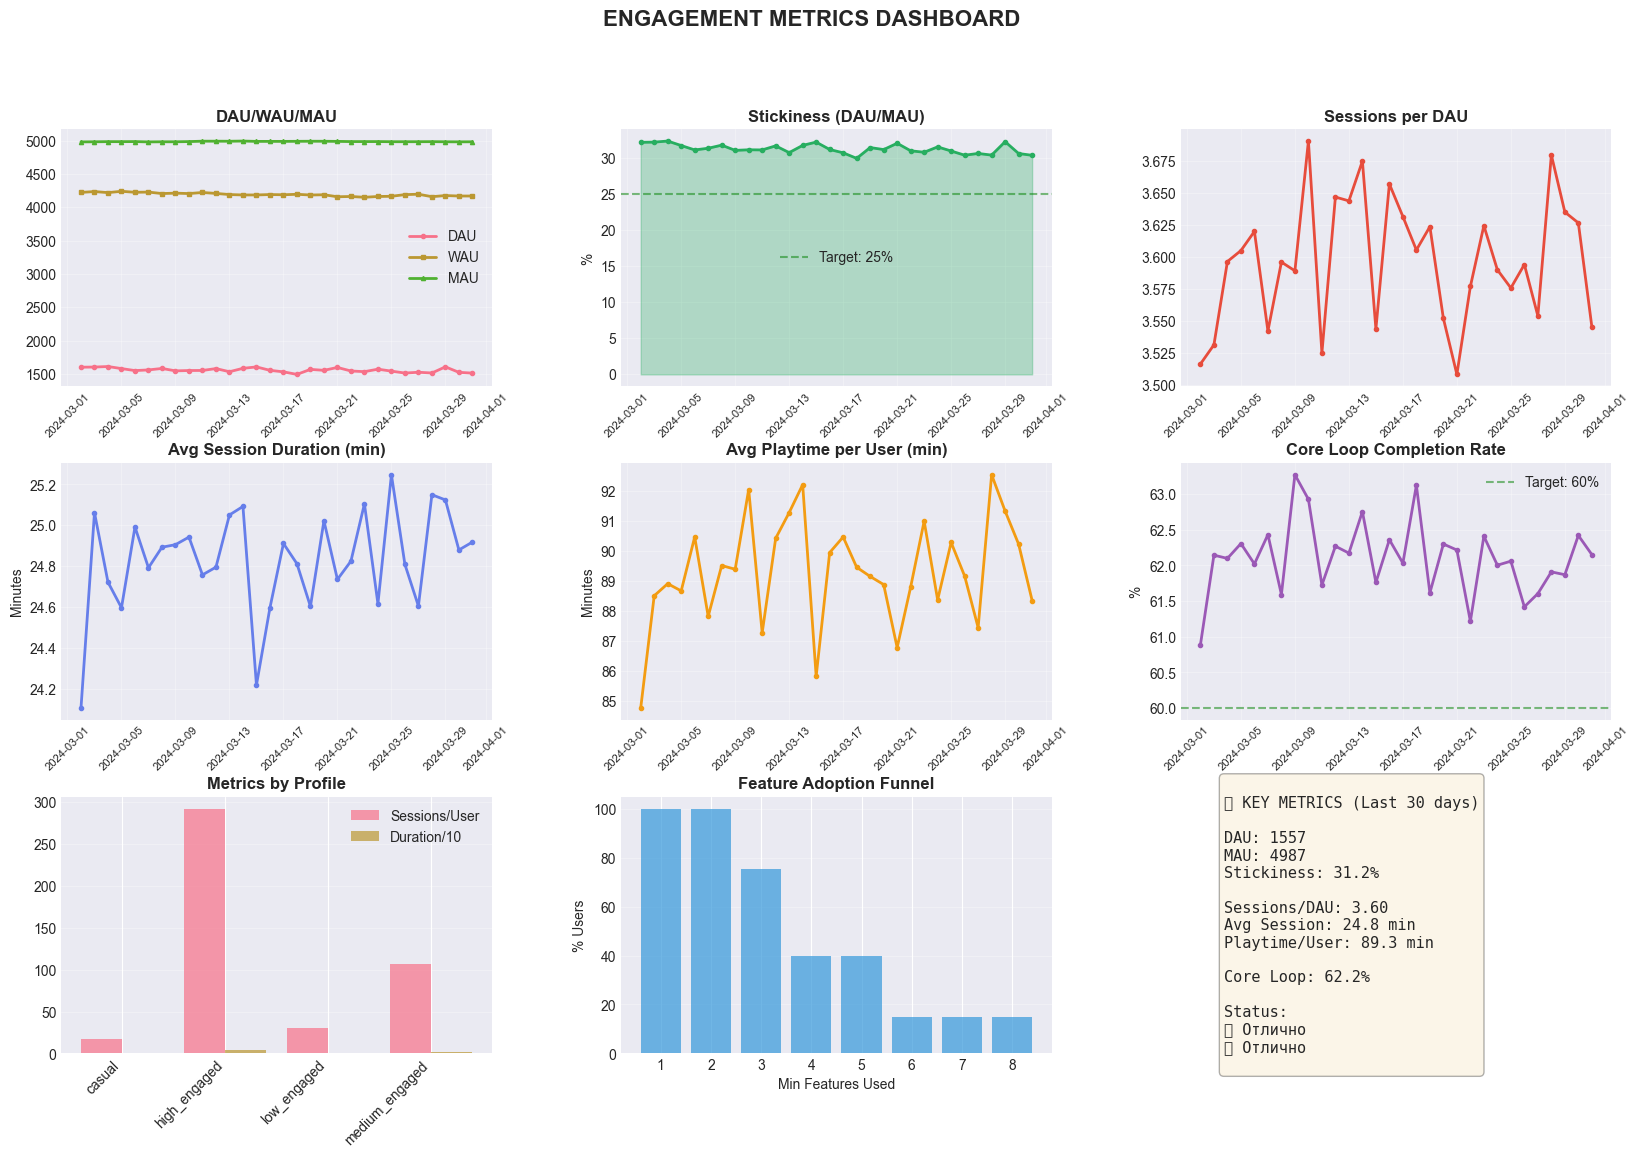

In [14]:
# Comprehensive Dashboard - все метрики на одном экране
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# График 1: DAU, WAU, MAU
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(recent_data['date'], recent_data['dau'], label='DAU', linewidth=2, marker='o', markersize=3)
ax1.plot(recent_data['date'], recent_data['wau'], label='WAU', linewidth=2, marker='s', markersize=3)
ax1.plot(recent_data['date'], recent_data['mau'], label='MAU', linewidth=2, marker='^', markersize=3)
ax1.set_title('DAU/WAU/MAU', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45, labelsize=8)

# График 2: Stickiness
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(recent_data['date'], recent_data['stickiness'], linewidth=2, color='#27ae60', marker='o', markersize=3)
ax2.axhline(y=25, color='green', linestyle='--', alpha=0.5, label='Target: 25%')
ax2.fill_between(recent_data['date'], recent_data['stickiness'], alpha=0.3, color='#27ae60')
ax2.set_title('Stickiness (DAU/MAU)', fontsize=12, fontweight='bold')
ax2.set_ylabel('%')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45, labelsize=8)

# График 3: Sessions per User
ax3 = fig.add_subplot(gs[0, 2])
daily_sessions = session_analysis['daily'].tail(30)
ax3.plot(daily_sessions['date'], daily_sessions['sessions_per_user'], 
         linewidth=2, color='#e74c3c', marker='o', markersize=3)
ax3.set_title('Sessions per DAU', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45, labelsize=8)

# График 4: Session Duration
ax4 = fig.add_subplot(gs[1, 0])
ax4.plot(daily_sessions['date'], daily_sessions['avg_duration'], 
         linewidth=2, color='#667eea', marker='o', markersize=3)
ax4.set_title('Avg Session Duration (min)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Minutes')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45, labelsize=8)

# График 5: Daily Playtime per User
ax5 = fig.add_subplot(gs[1, 1])
daily_playtime_recent = playtime_analysis['daily'].tail(30)
ax5.plot(daily_playtime_recent['date'], daily_playtime_recent['avg_playtime_per_user'], 
         linewidth=2, color='#f39c12', marker='o', markersize=3)
ax5.set_title('Avg Playtime per User (min)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Minutes')
ax5.grid(True, alpha=0.3)
ax5.tick_params(axis='x', rotation=45, labelsize=8)

# График 6: Core Loop Completion
ax6 = fig.add_subplot(gs[1, 2])
daily_completion_recent = core_loop_analysis['daily'].tail(30)
ax6.plot(daily_completion_recent['date'], daily_completion_recent['completion_rate'], 
         linewidth=2, color='#9b59b6', marker='o', markersize=3)
ax6.axhline(y=60, color='green', linestyle='--', alpha=0.5, label='Target: 60%')
ax6.set_title('Core Loop Completion Rate', fontsize=12, fontweight='bold')
ax6.set_ylabel('%')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.tick_params(axis='x', rotation=45, labelsize=8)

# График 7: Metrics by Profile
ax7 = fig.add_subplot(gs[2, 0])
x_pos = np.arange(len(profile_stats))
ax7.bar(x_pos - 0.2, profile_stats['sessions_per_user'], width=0.4, label='Sessions/User', alpha=0.7)
ax7.bar(x_pos + 0.2, profile_stats['avg_duration']/10, width=0.4, label='Duration/10', alpha=0.7)
ax7.set_xticks(x_pos)
ax7.set_xticklabels(profile_stats['profile'], rotation=45, ha='right')
ax7.set_title('Metrics by Profile', fontsize=12, fontweight='bold')
ax7.legend()
ax7.grid(True, alpha=0.3, axis='y')

# График 8: Feature Adoption
ax8 = fig.add_subplot(gs[2, 1])
ax8.bar(feature_adoption['min_features'], feature_adoption['adoption_rate'], 
        color='#3498db', alpha=0.7)
ax8.set_title('Feature Adoption Funnel', fontsize=12, fontweight='bold')
ax8.set_xlabel('Min Features Used')
ax8.set_ylabel('% Users')
ax8.grid(True, alpha=0.3, axis='y')

# График 9: Summary Metrics (текстовый)
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')

summary_text = f"""
📊 KEY METRICS (Last 30 days)

DAU: {avg_dau:.0f}
MAU: {avg_mau:.0f}
Stickiness: {avg_stickiness:.1f}%

Sessions/DAU: {avg_sessions_per_user:.2f}
Avg Session: {avg_session_duration:.1f} min
Playtime/User: {avg_playtime:.1f} min

Core Loop: {core_loop_rate:.1f}%

Status:
{stickiness_status}
{core_status}
"""

ax9.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

fig.suptitle('ENGAGEMENT METRICS DASHBOARD', fontsize=16, fontweight='bold', y=0.98)
plt.show()
